### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    OLLAMA_ENDPOINT="http://localhost:11434"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag",
    llm_tag="phi4-mini:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)

# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

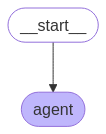

In [3]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [6]:
for message in result["messages"]:
    display(Markdown(f"```json\n --- \n{message.model_dump_json()}\n --- \n```"))

```json
 --- 
{"content":"<query>What is the pinnacle of excellence?</query> <context>Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy’s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke’s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy’s plans;\n---\nNeither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy’s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tzŭ reserves his approbation for things that\n\n\"the world’s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;\n---\nThus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.\n---\nThe Commander stands for the virtues of wisdom, sincerity, benevolence, courage and strictness.\n---\n[Literally, \"hides under the ninth earth,\" which is a metaphor indicating the utmost secrecy and concealment, so that the enemy may not know his whereabouts.\"]\n\nhe who is skilled in attack flashes forth from the topmost heights of heaven.\n\n[Another metaphor, implying that he falls on his adversary like a thunderbolt, against which there is no time to prepare. This is the opinion of most of the commentators.]\n---\nMaking no mistakes is what establishes the certainty of victory, for it means conquering an enemy that is already defeated.\n\nHence the skilful fighter puts himself into a position which makes defeat impossible, and does not miss the moment for defeating the enemy.\n\n[A \"counsel of perfection\" as Tu Mu truly observes. \"Position\" need not be confined to the actual ground occupied by the troops. It includes all the arrangements and preparations which a wise general will make to increase the safety of his army.]\n---\nThe consummate leader cultivates the moral law, and strictly adheres to method and discipline; thus it is in his power to control success.\n\nIn respect of military method, we have, firstly, Measurement; secondly, Estimation of quantity; thirdly, Calculation; fourthly, Balancing of chances; fifthly, Victory.\n\nMeasurement owes its existence to Earth; Estimation of quantity to Measurement; Calculation to Estimation of quantity; Balancing of chances to Calculation; and Victory to Balancing of chances.</context>","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":"209e67f3-bb75-41df-bec1-d8e15cda156b","example":false}
 --- 
```

```json
 --- 
{"content":"<thinking>\nThe user's question is a philosophical inquiry about the concept or pinnacle (acme) of excellence. Considering that context provided, it refers specifically within an ancient Chinese strategic military philosophy framework—how supreme excellence was understood in terms of leadership rather than just winning battles with violence.\n</thinking>\n\n<response>The pinnacle of excellence, as viewed through this historical lens from Sun Tzu's teachings on warfare and strategy (\"The Art of War\"), is not merely about conquest or victory. True supremacy lies beyond physical conflict; it's found within the realm of strategizing to overcome challenges without engaging in battle—hence \"supreme excellence consists in breaking the enemy’s resistance without fighting.\" It emphasizes wisdom, secrecy (concealing one's actual position), and controlling circumstances so that success is assured through superior planning rather than mere brute force or open confrontation. This ancient perspective extends into broader philosophical terms where moral integrity interplays with disciplined strategy to achieve ultimate victory.\n</response>","additional_kwargs":{},"response_metadata":{"model":"phi4-mini:latest","created_at":"2025-03-29T18:57:22.902997Z","done":true,"done_reason":"stop","total_duration":6279993750,"load_duration":16616833,"prompt_eval_count":760,"prompt_eval_duration":338004833,"eval_count":192,"eval_duration":5921488209,"message":{"role":"assistant","content":"","images":null,"tool_calls":null}},"type":"ai","name":null,"id":"run-8d1fb8fe-8c32-420b-b86f-05f5a85b51d9-0","example":false,"tool_calls":[],"invalid_tool_calls":[],"usage_metadata":{"input_tokens":760,"output_tokens":192,"total_tokens":952}}
 --- 
```

In [7]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [8]:
for message in result["messages"]:
    display(Markdown(f"```json\n --- \n{message.model_dump_json()}\n --- \n```"))

```json
 --- 
{"content":"<query>What is the pinnacle of excellence?</query> <context>Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy’s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke’s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy’s plans;\n---\nNeither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy’s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tzŭ reserves his approbation for things that\n\n\"the world’s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;\n---\nThus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.\n---\nThe Commander stands for the virtues of wisdom, sincerity, benevolence, courage and strictness.\n---\n[Literally, \"hides under the ninth earth,\" which is a metaphor indicating the utmost secrecy and concealment, so that the enemy may not know his whereabouts.\"]\n\nhe who is skilled in attack flashes forth from the topmost heights of heaven.\n\n[Another metaphor, implying that he falls on his adversary like a thunderbolt, against which there is no time to prepare. This is the opinion of most of the commentators.]\n---\nMaking no mistakes is what establishes the certainty of victory, for it means conquering an enemy that is already defeated.\n\nHence the skilful fighter puts himself into a position which makes defeat impossible, and does not miss the moment for defeating the enemy.\n\n[A \"counsel of perfection\" as Tu Mu truly observes. \"Position\" need not be confined to the actual ground occupied by the troops. It includes all the arrangements and preparations which a wise general will make to increase the safety of his army.]\n---\nThe consummate leader cultivates the moral law, and strictly adheres to method and discipline; thus it is in his power to control success.\n\nIn respect of military method, we have, firstly, Measurement; secondly, Estimation of quantity; thirdly, Calculation; fourthly, Balancing of chances; fifthly, Victory.\n\nMeasurement owes its existence to Earth; Estimation of quantity to Measurement; Calculation to Estimation of quantity; Balancing of chances to Calculation; and Victory to Balancing of chances.</context>","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":"209e67f3-bb75-41df-bec1-d8e15cda156b","example":false}
 --- 
```

```json
 --- 
{"content":"<thinking>\nThe user's question is a philosophical inquiry about the concept or pinnacle (acme) of excellence. Considering that context provided, it refers specifically within an ancient Chinese strategic military philosophy framework—how supreme excellence was understood in terms of leadership rather than just winning battles with violence.\n</thinking>\n\n<response>The pinnacle of excellence, as viewed through this historical lens from Sun Tzu's teachings on warfare and strategy (\"The Art of War\"), is not merely about conquest or victory. True supremacy lies beyond physical conflict; it's found within the realm of strategizing to overcome challenges without engaging in battle—hence \"supreme excellence consists in breaking the enemy’s resistance without fighting.\" It emphasizes wisdom, secrecy (concealing one's actual position), and controlling circumstances so that success is assured through superior planning rather than mere brute force or open confrontation. This ancient perspective extends into broader philosophical terms where moral integrity interplays with disciplined strategy to achieve ultimate victory.\n</response>","additional_kwargs":{},"response_metadata":{"model":"phi4-mini:latest","created_at":"2025-03-29T18:57:22.902997Z","done":true,"done_reason":"stop","total_duration":6279993750,"load_duration":16616833,"prompt_eval_count":760,"prompt_eval_duration":338004833,"eval_count":192,"eval_duration":5921488209,"message":{"role":"assistant","content":"","images":null,"tool_calls":null}},"type":"ai","name":null,"id":"run-8d1fb8fe-8c32-420b-b86f-05f5a85b51d9-0","example":false,"tool_calls":[],"invalid_tool_calls":[],"usage_metadata":{"input_tokens":760,"output_tokens":192,"total_tokens":952}}
 --- 
```

```json
 --- 
{"content":"<query>Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.</query> <context>[Mei Yao-ch’en says: \"plentifully provided with roads and means of communications.\"]\n\n(2) entangling ground;\n\n[The same commentator says: \"Net-like country, venturing into which you become entangled.\"]\n\n(3) temporising ground;\n\n[Ground which allows you to \"stave off\" or \"delay.\"]\n\n(4) narrow passes; (5) precipitous heights; (6) positions at a great distance from the enemy.\n---\nTherefore in chariot fighting, when ten or more chariots have been taken, those should be rewarded who took the first. Our own flags should be substituted for those of the enemy, and the chariots mingled and used in conjunction with ours. The captured soldiers should be kindly treated and kept.\n\nThis is called, using the conquered foe to augment one’s own strength.\n\nIn war, then, let your great object be victory, not lengthy campaigns.\n---\n[The five cardinal virtues of the Chinese are (1) humanity or benevolence; (2) uprightness of mind; (3) self-respect, self-control, or \"proper feeling;\" (4) wisdom; (5) sincerity or good faith. Here \"wisdom\" and \"sincerity\" are put before \"humanity or benevolence,\" and the two military virtues of \"courage\" and \"strictness\" substituted for \"uprightness of mind\" and \"self-respect, self-control, or ‘proper feeling.’\"]\n---\nBy persistently hanging on the enemy’s flank,\n\n[I understand the first four words to mean \"accompanying the enemy in one direction.\" Ts’ao Kung says: \"unite the soldiers and make for the enemy.\" But such a violent displacement of characters is quite indefensible.]\n\nwe shall succeed in the long run\n\n[Literally, \"after a thousand li.\"]\n\nin killing the commander-in-chief.\n\n[Always a great point with the Chinese.]\n\nThis is called ability to accomplish a thing by sheer cunning.\n---\n[That is, cutting up the army into regiments, companies, etc., with subordinate officers in command of each. Tu Mu reminds us of Han Hsin’s famous reply to the first Han Emperor, who once said to him: \"How large an army do you think I could lead?\" \"Not more than 100,000 men, your Majesty.\" \"And you?\" asked the Emperor. \"Oh!\" he answered, \"the more the better.\"]\n---\nIf asked how to cope with a great host of the enemy in orderly array and on the point of marching to the attack, I should say: \"Begin by seizing something which your opponent holds dear; then he will be amenable to your will.\"\n---\n[Owing to the double meanings in the Chinese text, the latter part of the sentence is susceptible of quite a different meaning: \"And thus, the weapon not being blunted by use, its keenness remains perfect.\"]\n\nThis is the method of attacking by stratagem.\n\nIt is the rule in war, if our forces are ten to the enemy’s one, to surround him; if five to one, to attack him;\n\n[Straightway, without waiting for any further advantage.]\n\nif twice as numerous, to divide our army into two.</context>","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":"3642928c-95f6-4e05-82dc-3d739d2f02d8","example":false}
 --- 
```

```json
 --- 
{"content":"<thinking>\nThe user wants a concise translation of previous Chinese military texts related to strategy and excellence in warfare translated into Dutch. The context includes different types of terrains used strategically during battle (2-6) followed by the importance placed on capturing chariots first which should then be integrated with one's own forces, replacing enemy flags as well.\n</thinking>\n\n<response>De hoogste prestatie is niet het bezetten van de vijand met geweld. Het ligt in de kunst om door slimme strategie te overwinnen (1-6). De eerste vangst van tientallen paardenrijden belohnt degene die er eerst bijvindt; vervang je voettekens, vlaggen en mix je gevangengenomen soldaten op eerbiedlijke wijze terug in eigen linies. Dit wordt 'versterken met de vijandelijk getrouwe' genoemd (7-8). In het strijden is overwinning prioriteit boven lange campagnes (9), wat overeenkomt met vijf kerntuggelingen: menselijkheid, onverskrokene ziel, zelfrespect en zelfdiscipline; wijsheid en eerlijkheid (10). Het omarmen van de vijand aan de schenen brengt ten einde in het doden van zijn generaal. Dit is 'sleutelwet' genoemd - een overwinning behalen door eigen slimme manieren (11-12). Als tegenstander minder machtige is, moet je je splitsen; als hij vechtsvachtiger bent, concentreer je op hem (13).\n</response>","additional_kwargs":{},"response_metadata":{"model":"phi4-mini:latest","created_at":"2025-03-29T18:57:36.063122Z","done":true,"done_reason":"stop","total_duration":12948971708,"load_duration":15617416,"prompt_eval_count":1659,"prompt_eval_duration":2433825833,"eval_count":308,"eval_duration":10485190500,"message":{"role":"assistant","content":"","images":null,"tool_calls":null}},"type":"ai","name":null,"id":"run-668eeaa4-37cb-461d-810f-2fce35e62b53-0","example":false,"tool_calls":[],"invalid_tool_calls":[],"usage_metadata":{"input_tokens":1659,"output_tokens":308,"total_tokens":1967}}
 --- 
```